# Using Jupyter to Query the WRDS Database

In [30]:
## This notebook provides an introduction to installing and importing WRDS and some sample queries to explore available data sets.
## Register for an account at https://wrds-www.wharton.upenn.edu/

In [31]:
## The following installs and imports WRDS 

In [32]:
!pip install wrds

Note: you may need to restart the kernel to use updated packages.


In [33]:
import wrds

In [34]:
## The following defines the function of your WRDS connection.You can replace "fx" with any text. 
## Login with your WRDS username and password when prompted. Creating a .pgpass file is recommended.

In [35]:
fx = wrds.Connection()

Enter your WRDS username [jovyan]: pei05lun
Enter your password: ········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [36]:
## This imports a few commonly used python libraries.

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import psycopg2 
import matplotlib.pyplot as plt

In [38]:
## The following lists all WRDS data sets or "libraries" we subscribe to. These can also be explored using the web interface.

In [39]:
fx.list_libraries()

['aha_sample',
 'ahasamp',
 'audit',
 'audit_audit_comp',
 'audit_common',
 'audit_corp_legal',
 'auditsmp',
 'auditsmp_all',
 'bank',
 'bank_all',
 'block',
 'block_all',
 'boardex',
 'boardex_na',
 'boardex_trial',
 'boardsmp',
 'bvd_amadeus_trial',
 'bvd_bvdbankf_trial',
 'bvd_orbis_trial',
 'bvdsamp',
 'calcbench_trial',
 'calcbnch',
 'cboe',
 'cboe_all',
 'ciqsamp',
 'ciqsamp_capstrct',
 'ciqsamp_common',
 'ciqsamp_keydev',
 'ciqsamp_pplintel',
 'ciqsamp_ratings',
 'ciqsamp_transactions',
 'ciqsamp_transcripts',
 'cisdmsmp',
 'columnar',
 'comp',
 'comp_bank',
 'comp_bank_daily',
 'comp_execucomp',
 'comp_global',
 'comp_global_daily',
 'comp_na_annual_all',
 'comp_na_daily_all',
 'comp_na_monthly_all',
 'comp_segments_hist',
 'comp_segments_hist_daily',
 'comp_urq',
 'compa',
 'compb',
 'compg',
 'comph',
 'compm',
 'compsamp',
 'compsamp_all',
 'compsamp_snapshot',
 'compseg',
 'contrib',
 'contrib_as_filed_financials',
 'contrib_ceo_turnover',
 'contrib_char_returns',
 'contrib

In [40]:
## The following lists the tables in the djones (Historical Dow Jones Indexes) library. In this library there are only two tables.

In [41]:
fx.list_tables(library='djones')

['djdaily', 'djmonthly']

In [42]:
fx.describe_table(library='djones', table='djmonthly')
## This describe the "monthly" table. For detailed descriptions of these variables see: 
## https://wrds-www.wharton.upenn.edu/pages/get-data/dow-jones-averages-total-return-indexes/dow-jones-monthly/

Approximately 2429 rows in djones.djmonthly.


,name,nullable,type,comment
0,date,True,DATE,None
1,djc,True,DOUBLE_PRECISION,None
2,djct,True,DOUBLE_PRECISION,None
3,dji,True,DOUBLE_PRECISION,None
4,djit,True,DOUBLE_PRECISION,None
5,djt,True,DOUBLE_PRECISION,None
6,djtt,True,DOUBLE_PRECISION,None
7,dju,True,DOUBLE_PRECISION,None
8,djut,True,DOUBLE_PRECISION,None
9,d10,True,DOUBLE_PRECISION,None


In [43]:
## This retrieves all Dow Jones monthly index variables starting from 2000-01-01 using a raw_sql command.
djm_data = fx.raw_sql("select * FROM djones.djmonthly WHERE date>'2000-01-01'")
djm_data

,date,djc,djct,dji,djit,djt,djtt,dju,djut,d10,d10t,d5,d5t
0,2000-01-26,NaN,NaN,11032.99,15473.31,2664.79,3231.05,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808.96,1350.59,888.29,1447.55
2,2000-02-01,3101.97,4415.75,NaN,NaN,NaN,NaN,312.95,653.55,NaN,NaN,NaN,NaN
3,2000-02-25,NaN,NaN,9862.12,13854.48,2351.26,2856.76,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.31,1216.67,780.20,1272.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2008-04-25,NaN,NaN,12891.86,21494.95,5117.37,6846.16,NaN,NaN,NaN,NaN,NaN,NaN
243,2008-05-01,4543.16,7717.15,NaN,NaN,NaN,NaN,516.84,1456.23,NaN,NaN,NaN,NaN
244,2008-05-23,NaN,NaN,12479.63,20876.01,5145.14,6894.79,NaN,NaN,NaN,NaN,NaN,NaN
245,2008-05-30,4514.44,7690.14,NaN,NaN,NaN,NaN,521.65,1476.33,NaN,NaN,NaN,NaN


In [44]:
## This retrieves the first two years of the Dow Jones Monthly Industial average closing values (dji). 
dow_jones_index = fx.raw_sql('SELECT date, dji FROM djones.djmonthly LIMIT 24')
dow_jones_index

,date,dji
0,1896-05-26,40.94
1,1896-06-26,37.89
2,1896-07-24,31.54
3,1896-08-26,30.29
4,1896-09-25,36.61
5,1896-10-26,38.71
6,1896-11-25,42.47
7,1896-12-24,40.02
8,1897-01-26,42.22
9,1897-02-26,41.29


Text(0, 0.5, 'Dow Jones Industrial Average')

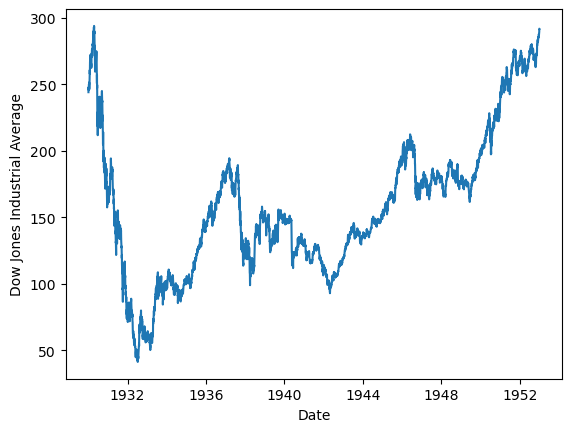

In [45]:
## This plot shows the history of the Dow Jones Industrials from 1930 to 1953.  
## Note that the data from this library was discontinued in 2008 
datadaily = fx.raw_sql("select date,dji from djones.djdaily WHERE date BETWEEN '1930-01-01' AND '1953-01-01'", date_cols=['date'], index_col=['date'])
plt.plot(datadaily),
plt.xlabel('Date')
plt.ylabel('Dow Jones Industrial Average')

In [46]:
##This get_table command retrieves the first 10 observations from the Compustat Library (comp) company table.
company1 = fx.get_table(library='comp', table='company',obs=10)
company1

,conm,gvkey,add1,add2,add3,add4,addzip,busdesc,cik,city,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,A & E PLASTIK PAK INC,001000,None,None,None,None,None,A & E Plastik Pak Inc. is a commodity chemical...,None,None,...,01,3089,325,978,None,None,0,None,1978-06-30,None
1,A & M FOOD SERVICES INC,001001,1924 South Utica Avenue,None,None,None,94104,None,0000723576,Tulsa,...,01,5812,420,978,None,OK,0,None,1986-07-31,None
2,AAI CORP,001002,124 Industry Lane,None,None,None,21030-0126,"Textron Systems Corporation designs, develops,...",0001306124,Hunt Valley,...,01,3825,230,940,None,MD,0,www.textronsystems.com,1977-03-31,None
3,A.A. IMPORTING CO INC,001003,7700 Hall Street,None,None,None,63125,"A.A. Importing Company, Inc. designs, manufact...",0000730052,St. Louis,...,01,5712,449,976,None,MO,3,www.aaimporting.com,1992-04-30,None
4,AAR CORP,001004,"One AAR Place, 1100 North Wood Dale Road",None,None,None,60191,AAR Corp. provides products and services to co...,0000001750,Wood Dale,...,01,5080,110,925,B,IL,0,www.aarcorp.com,None,1972-04-24
5,A.B.A. INDUSTRIES INC,001005,10260 US Highway 19 North,None,None,None,33782,A.B.A. Industries Inc. was acquired by McSwain...,None,Pinellas Park,...,01,3724,110,925,None,FL,0,None,1983-01-31,None
6,ABC INDS INC,001006,301 Kings Highway,None,None,None,46590,"ABC Industries, Inc. manufactures and supplies...",None,Winona Lake,...,01,2711,415,976,None,IN,3,www.abc-industries.net,1983-06-30,None
7,ABKCO INDUSTRIES INC,001007,"1700 Broadway, Suite 41",None,None,None,10019,"ABKCO Music & Records, Inc. operates as an ent...",0000001882,New York,...,01,3652,220,925,None,NY,3,www.abkco.com,1986-12-31,None
8,ABM COMPUTER SYSTEMS INC,001008,3 Whatney,None,None,None,92714,ABM Computer Systems Inc. was acquired by Fran...,None,Irvine,...,01,3577,188,940,None,CA,0,None,1987-10-31,None
9,ABS INDUSTRIES INC,001009,"Interstate Square, Suite 300",None,None,None,44904,"ABS Industries, Inc., through Colfor and Colma...",0000313368,Willoughby,...,01,3460,355,925,None,OH,3,None,1996-12-31,None


In [47]:
## Same Query but narrows down to specific columns. The gvkey is a unique identifier used by Compustat.
company_narrow = fx.get_table(library='comp', table='company', columns = ['conm', 'gvkey', 'busdesc', 'state', 'sic', 'cik'], 
    obs=5)
company_narrow

,conm,gvkey,busdesc,state,sic,cik
0,A & E PLASTIK PAK INC,001000,A & E Plastik Pak Inc. is a commodity chemical...,None,3089,None
1,A & M FOOD SERVICES INC,001001,None,OK,5812,0000723576
2,AAI CORP,001002,"Textron Systems Corporation designs, develops,...",MD,3825,0001306124
3,A.A. IMPORTING CO INC,001003,"A.A. Importing Company, Inc. designs, manufact...",MO,5712,0000730052
4,AAR CORP,001004,AAR Corp. provides products and services to co...,IL,5080,0000001750


In [48]:
##The following lists the tables in the boardex_na (Boardex North America) library. Boardex has biographical data for executives and board members.
fx.list_tables(library='boardex_na')

['chars',
 'chars_na',
 'na_board_characteristics',
 'na_board_dir_announcements',
 'na_board_dir_committees',
 'na_board_education_assoc',
 'na_board_listed_assoc',
 'na_board_nfp_assoc',
 'na_board_other_assoc',
 'na_board_unlisted_assoc',
 'na_company_profile_advisors',
 'na_company_profile_details',
 'na_company_profile_market_cap',
 'na_company_profile_sr_mgrs',
 'na_company_profile_stocks',
 'na_dir_characteristics',
 'na_dir_education_assoc',
 'na_dir_listed_assoc',
 'na_dir_nfp_assoc',
 'na_dir_other_assoc',
 'na_dir_profile_achievements',
 'na_dir_profile_details',
 'na_dir_profile_education',
 'na_dir_profile_emp',
 'na_dir_profile_other_activ',
 'na_dir_standard_remun',
 'na_dir_unlisted_assoc',
 'na_ltip_compensation',
 'na_ltip_wealth',
 'na_options_compensation',
 'na_options_wealth',
 'na_wrds_board_char_overall',
 'na_wrds_company_dir_names',
 'na_wrds_company_director_names',
 'na_wrds_company_names',
 'na_wrds_company_networks',
 'na_wrds_company_profile',
 'na_wrds_c

In [49]:
## This gives the first 10 observations from the Boardex Library education association table.
Boards = fx.get_table(library='boardex_na', table='na_board_education_assoc',obs=8)
Boards

,boardname,companyname,directorname,overlapyearstart,overlapyearend,orgtype,boardid,companyid,directorid
0,TWITTER INC (De-listed 10/2022),Massachusetts Institute of Technology (MIT) Sl...,Jeremy Rishel,2013,2014,Universities,2006706.0,63283.0,2479251.0
1,XEROX HOLDINGS CORP (Xerox Corp prior to 08/2019),Institute of Management Development and Resear...,Nitin Ahuja,1989,1991,Private,33850.0,1280865.0,1642488.0
2,Foley & Lardner LLP (Friedman Wang & Bleiberg ...,Loyola Law School Los Angeles,Mary Habte,2007,2007,Universities,570020.0,2331657.0,1705537.0
3,AK STEEL HOLDING CORP (De-listed 03/2020),Mendoza College of Business University of Notr...,Greg Hoffbauer,2014,2016,Universities,1216.0,532330.0,1292770.0
4,EASTMAN CHEMICAL CO,Wharton School (The) University of Pennsylvania,Doctor Lucian Boldea,2005,2006,Universities,9940.0,64966.0,1676914.0
5,PACCAR INC,Seattle University,Kyle Quinn,2005,2008,Universities,23563.0,61811.0,1056654.0
6,Schnader Harrison Segal & Lewis LLP,US Green Building Council,Ron Cusano,2013,2014,Private,78842.0,637697.0,1876771.0
7,AVAYA INC (De-listed 10/2007),Leonard N Stern School of Business New York Un...,Chris Daniels,2002,2004,Universities,3191.0,42226.0,2028162.0


In [50]:
## This is an advanced join command from two compustat libraries: fundamentals and monthly securities prices. Joining data sets is your economics data superpower  
fx.raw_sql("""
    SELECT a.gvkey, a.datadate, a.tic, a.conm, a.at, a.aco, a.capx, b.prccm, b.cshoq, b.trfm
    FROM comp.funda a
    JOIN comp.secm b ON a.gvkey = b.gvkey AND a.datadate = b.datadate
    WHERE a.tic = 'AAPL' AND a.datafmt = 'STD' AND a.consol = 'C' AND a.indfmt = 'INDL'
""")

,gvkey,datadate,tic,conm,at,aco,capx,prccm,cshoq,trfm
0,001690,1981-09-30,AAPL,APPLE INC,254.838,8.067,24.529,15.2500,55.309,1.0000
1,001690,1982-09-30,AAPL,APPLE INC,357.787,11.312,26.470,18.2500,57.123,1.0000
2,001690,1983-09-30,AAPL,APPLE INC,556.579,46.832,52.666,23.1250,59.198,1.0000
3,001690,1984-09-30,AAPL,APPLE INC,788.786,49.806,39.614,25.1250,60.535,1.0000
4,001690,1985-09-30,AAPL,APPLE INC,936.177,97.944,54.064,15.7500,61.850,1.0000
5,001690,1986-09-30,AAPL,APPLE INC,1160.128,92.913,66.629,33.5000,62.628,1.0000
6,001690,1987-09-30,AAPL,APPLE INC,1477.931,110.941,86.127,56.5000,126.088,1.0026
7,001690,1988-09-30,AAPL,APPLE INC,2082.086,136.991,144.001,43.2500,122.768,1.0109
8,001690,1989-09-30,AAPL,APPLE INC,2743.899,217.277,238.993,44.5000,126.270,1.0208
9,001690,1990-09-30,AAPL,APPLE INC,2975.707,288.894,224.305,29.0000,115.359,1.0324


In [51]:
## This notebook was derived in part from examples on the WRDS web site. For more info see:
## https://wrds-www.wharton.upenn.edu/pages/classroom/using-jupyter-at-wrds-notebook/
## https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/querying-wrds-data-python/